In [105]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn import svm

In [106]:
def plot_data(X,y):
    plt.figure()
    plt.plot(X[np.where(y==0),0],X[np.where(y==0),1],'r.')
    plt.plot(X[np.where(y==1),0],X[np.where(y==1),1],'b+')
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.show()

In [107]:
def plot_results(X,y,h,svm_classifier,title):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.plot(X[np.where(y==0),0],X[np.where(y==0),1],'b.')
    plt.plot(X[np.where(y==1),0],X[np.where(y==1),1],'r+')
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.title(title)
    plt.show()

Example 1: When the data is linearly separable

Loading visualization data
Shape of X  (51, 2)
Shape of y (51, 1)


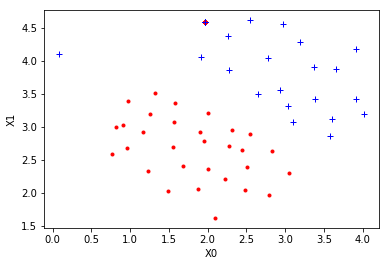

In [108]:
print("Loading visualization data")
data = scipy.io.loadmat('ex6data1.mat')
X,y=data['X'],data['y']
print("Shape of X ",X.shape)
print("Shape of y",y.shape)
plot_data(X,y)

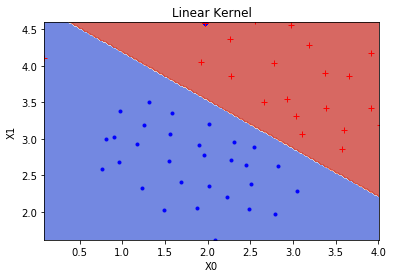

In [120]:
h=0.02
C=1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y.ravel())
#svc = svm.SVC(kernel='rbf', gamma=1.0, C=C).fit(X, y.ravel())
#svc = svm.SVC(kernel='poly', gamma=6.0,degree=5, C=C).fit(X, y.ravel())
#svc = svm.SVC(kernel='sigmoid', gamma=4, C=C).fit(X, y.ravel())
#lin_svc = svm.LinearSVC(C=C).fit(X, y.ravel())
plot_results(X,y,h,svc,"Linear Kernel")

Example 2: Non linearly-separable data 

Loading visualization data
Shape of X  (863, 2)
Shape of y (863, 1)


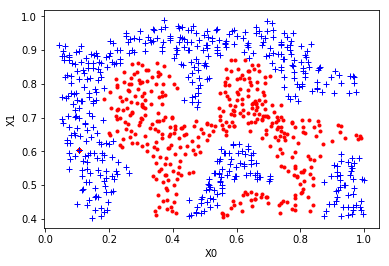

In [126]:
print("Loading visualization data")
data = scipy.io.loadmat('ex6data2.mat')
X,y=data['X'],data['y']
print("Shape of X ",X.shape)
print("Shape of y",y.shape)
plot_data(X,y)

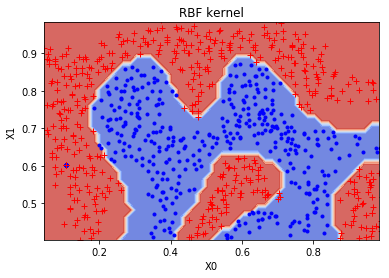

In [127]:
h=0.02
C=1000.0
#svc = svm.SVC(kernel='linear', C=C).fit(X, y.ravel())
svc = svm.SVC(kernel='rbf', gamma=10.0, C=C).fit(X, y.ravel())
#svc = svm.SVC(kernel='poly', gamma=6.0,degree=5, C=C).fit(X, y.ravel())
#svc = svm.SVC(kernel='sigmoid', gamma=4, C=C).fit(X, y.ravel())
#lin_svc = svm.LinearSVC(C=C).fit(X, y.ravel())
plot_results(X,y,h,svc,"RBF kernel")